# PandaRoot Digitalization Plots

Plots of the **MC Hits** in the tracking systems of the PANDA detector, created with PandaRoot.

## Python Imports

Import the required python packages

In [9]:
# python IO for ROOT files
import uproot

# numpy
import numpy as np

# For interactive plotting
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib widget

import seaborn as sns

import pandas as pd

# to get access to the pdg database 2024 version
import pdg
PdgApi = pdg.connect('sqlite:///../pdgall-2024-v0.1.0.sqlite')

snsColors = sns.color_palette("deep").as_hex()
snsColorNames = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan"]
snsPal = {name: snsColors[i] for i, name in enumerate(snsColorNames)}

## Global Parameters

Get/set the paths to the input and output files.

Path to the root files with the data that should be plotted:

In [2]:
rootFilePath = "/home/nikin105/mlProject/simFiles/XiAntiXi/root"

Path where the images should be saved

In [3]:
imagePath = "/home/nikin105/sciebo/Doktor/Pictures/simulation-visualization/digi"

Name of the simulations (prefix) that should be plotted:

In [4]:
projectName = "XiAntiXi"

### Import Parameters

Import the parameters corresponding to the detector responses, from the corresponding root file.

Digitalization root file:

In [5]:
digiFile = rootFilePath + "/" + projectName + "_digi.root"
print("Input digitalization file: ",digiFile)
hit_params = uproot.open(digiFile+":pndsim")

Input digitalization file:  /home/nikin105/mlProject/simFiles/XiAntiXi/root/XiAntiXi_digi.root


#### Straw Tube Detector (STT) : `STTHit`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TimeStamp			| Time of digit or Hit 									| ns	| Double_t		| FairHit							|
| TimeStampError	| Errors of the time of digit or Hit					| ns	| Doulbe_t		| FairHit							|
| D(x,y,z)			| Errors in position coordinates						| cm	| Double32_t	| FairHit							|
| RefIndex			| Index of FairMCPoint for this hit						| -		| Int_t			| FairHit							|
| DetectorID		| Detector unique volume ID								| -		| Int_t			| FairHit							|
| (X,Y,Z)			| Position coordinates of the tube 						| cm	| Double32_t	| FairHit							|
| TubeID			| Unique tube ID										| -		| Int_t			| PndSttHit							|
| Pulse				| Time pulse											| ns	| Double_t		| PndSttHit							|
| Isochrone			| The radial measurement								| cm	| Double_t		| PndSttHit							|
| IsochroneError	| The error on on the radial measurement				| cm	| Double_t		| PndSttHit							|
| DepCharge			| Deposited charge										| -		| Double_t		| PndSttHit							|

#### Micro Vertex Detector (MVD) : `MVDHitsPixel` & `MVDHitsStrip`

pos and mom are given in x, y, and z coordinates in the lab frame

| Parameter Name	| Description 											| Unit	| Type			|	 Class							|
|-------------------|-------------------------------------------------------|-------|---------------|-----------------------------------|
| UniqueID			| Object unique identifier								| -		| UInt_t		| TObject							|
| Bits				| Bit field status word									| -		| UInt_t		| TObject 							|
| Link				| 														| -		| unique_ptr	| FairMultiLinkedData_Interface		|
| TimeStamp			| Time of digit or Hit 									| ns	| Double_t		| FairHit							|
| TimeStampError	| Errors of the time of digit or Hit					| ns	| Doulbe_t		| FairHit							|
| D(x,y,z)			| Errors in position coordinates						| cm	| Double32_t	| FairHit							|
| RefIndex			| Index of FairMCPoint for this hit						| -		| Int_t			| FairHit							|
| DetectorID		| Detector unique volume ID								| -		| Int_t			| FairHit							|
| (X,Y,Z)			| Position coordinates of the tube 						| cm	| Double32_t	| FairHit							|
| SensorID			| Sensor ID												| -		| Int_t			| PndSdsHit (?)
| Charge			| Charge measured in hit								| e		| Double_t		| PndSdsHit (?)
| NDigiHits			| Number of pixels fired for this event					| -		| Int_t			| PndSdsHit (?)
| ClusterIndex		| Cluster number										| -		| Int_t			| PndSdsHit (?)
| BotIndex			| Bottom Cluster ID (?)									| -		| Int_t			| PndSdsHit (?)
| Cov				| Covariance matrix of the hit position (?)				| cm	| TMatrixD		| PndSdsHit (?)

## Plots

### Plot xy-Projections with Colormaps for various Parameters

#### Set the Parameters for the Plots

In [8]:
eventNumber = 0

# Get STT geometry
data : pd.DataFrame = pd.read_csv('/home/nikin105/mlProject/pandaml/visualization/detectorGeometries/STT/tubePos.csv')
data.columns = data.columns.str.strip()

# Get STT parameters

# Coordinates
stt_x = hit_params["STTHit.fX"].array(library="np")[eventNumber]
stt_y = hit_params["STTHit.fY"].array(library="np")[eventNumber]
stt_z = hit_params["STTHit.fZ"].array(library="np")[eventNumber]

# Positions Uncertainties
stt_xErr = hit_params["STTHit.fDx"].array(library="np")[eventNumber]
stt_yErr = hit_params["STTHit.fDy"].array(library="np")[eventNumber]
stt_zErr = hit_params["STTHit.fDz"].array(library="np")[eventNumber]

# Isochrone Radius
stt_isoR = hit_params["STTHit.fIsochrone"].array(library="np")[eventNumber]

# Isochrone Radius Uncertainty
stt_isoRErr = hit_params["STTHit.fIsochroneError"].array(library="np")[eventNumber]

#### Plot the xy-Projection of the STT Hits

Saving png image to:  /home/nikin105/sciebo/Doktor/Pictures/simulation-visualization/digiXiAntiXi_xyProjection_0.png
Saving pdf image to:  /home/nikin105/sciebo/Doktor/Pictures/simulation-visualization/digiXiAntiXi_xyProjection_0.pdf


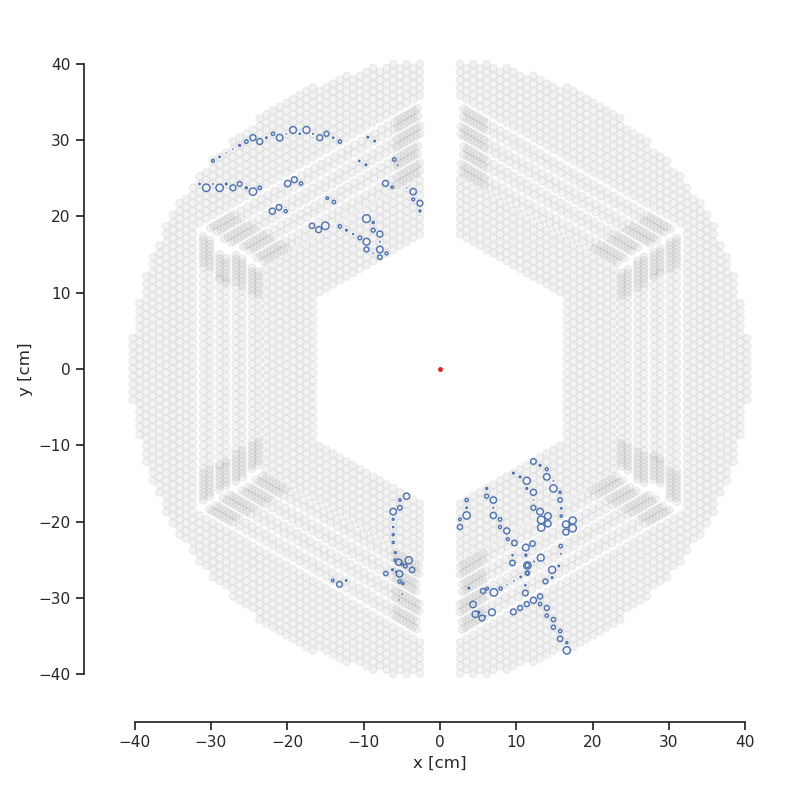

In [14]:
plt.close('all')

# Set the general style of the plot using seaborn
sns.set_theme()
sns.set_style("ticks")
sns.set_context("notebook")

fig, ax = plt.subplots(figsize=(8,8))

# Plot the IP
ax.plot(0,0,marker='.',ms=5, color='tab:red')

for index, row in data.iterrows():
	if row['angle[°]'] == 0:
		straightTube = patches.Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], color='gray', alpha=0.1)
		ax.add_patch(straightTube)
	elif np.sign(row['angle[°]']) == 1:
		posSkewedTube = patches.Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], color='gray', alpha=0.1)
		ax.add_patch(posSkewedTube)
	elif np.sign(row['angle[°]']) == -1:
		negSkewedTube = patches.Circle((row['x[cm]'], row['y[cm]']), row['outerRadius[cm]'], color='gray', alpha=0.1)
		ax.add_patch(negSkewedTube)
	else:
		raise Exception("Invalid angle")

# ax.plot(stt_x, stt_y, marker='.', color='tab:blue', linestyle='None')

for i in range(len(stt_x)):
	isochrone1 = patches.Circle((stt_x[i], stt_y[i]), stt_isoR[i]+stt_isoRErr[i], ec=snsPal['blue'], fc='None')
	ax.add_patch(isochrone1)

# Set the axis labels and limits
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")

# Set the aspect ratio to be equal
ax.set_aspect('equal')

sns.despine(offset=10, trim=True)
fig.tight_layout()	

imgPath = imagePath + projectName + "_xyProjection_" + str(eventNumber)

print("Saving png image to: ", imgPath+".png")
#plt.savefig(imgPath+".png", dpi=300, bbox_inches='tight')

print("Saving pdf image to: ", imgPath+".pdf")
#plt.savefig(imgPath+".pdf", dpi=300, bbox_inches='tight')